<a href="https://colab.research.google.com/github/Mahtab14H/BDDA-all/blob/main/start_up_success_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing Useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter("ignore")

In [2]:
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter("ignore")

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Mahtab14H/BDDA-all/main/startup%20data.csv")
df.head()
df.columns.values.tolist()

['Unnamed: 0',
 'state_code',
 'latitude',
 'longitude',
 'zip_code',
 'id',
 'city',
 'Unnamed: 6',
 'name',
 'labels',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'state_code.1',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'category_code',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'object_id',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'status']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

Checking the shape of data means how many rows and columns available in the present data.

In [7]:
df.shape

(923, 49)

From the shape command, we get to know that this data set has 923 rows and 49 columns (attributes).

Converting status column data into "1" and "0".

In [ ]:
df["status"] = np.where(df["status"]== 'closed', 0, 1)

In [ ]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,0


In [ ]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

Checking the labels column values and status column values are same.

In [ ]:
pd.isnull(df["labels"]==df["status"]).sum()

0

After cheacking both columns values, we got to know that both column show the same data.

Dropping some columns which are not useful.

In [ ]:
df= df.drop(["Unnamed: 0", "Unnamed: 6", "labels","closed_at", "id"], axis=1)

In [ ]:
df.shape

(923, 44)

 Checking null values in data set

In [ ]:
df.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biote

We have null values in closed_at, age_first_milestone_year, age_last_milestone_year and state_code.1 variavles. Now, we need to fill these null values issue with this data set.

We have null values in closed_at, age_first_milestone_year, age_last_milestone_year and state_code.1 variavles. Now, we need to solve this null value issue. to delaing with this issue, we are using "ffill" method to fill null values.

As closed_at variable have more than 50% null values, so we drop this variables from the data. age_first_milestone_year, age_last_milestone_year and state_code.1 also have less than 20% missing values. we will fill these null value with 'ffill' command which stands for 'forward fill' and will propagate last valid observation forward.

In [ ]:
df["age_first_milestone_year"] = df["age_first_milestone_year"].fillna(method="ffill")
df["age_last_milestone_year"] = df["age_last_milestone_year"].fillna(method="ffill")

df["state_code.1"] = df["state_code.1"].fillna(method="ffill")

In [ ]:
df.isnull().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
city                        0
name                        0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_otherca

In [ ]:
df.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,2.235630,3.931456,3.114172,4.820780,7.710726,2.310943,2.541975e+07,1.841820,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,3.741497,22.394167,2.510449,2.967910,2.960720,3.183375,7.265776,1.390922,1.896344e+08,1.322632,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.198732,0.576700,1.669850,1.000000,2.498600,3.000000,1.000000,2.725000e+06,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.374037,1.446600,3.528800,2.646600,4.569900,5.000000,2.000000,1.000000e+07,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,40.730646,-77.214731,3.575350,5.560250,4.902750,6.852050,10.000000,3.000000,2.472500e+07,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


Dropping columns

In [ ]:
df.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,2.235630,3.931456,3.114172,4.820780,7.710726,2.310943,2.541975e+07,1.841820,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,3.741497,22.394167,2.510449,2.967910,2.960720,3.183375,7.265776,1.390922,1.896344e+08,1.322632,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.198732,0.576700,1.669850,1.000000,2.498600,3.000000,1.000000,2.725000e+06,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.374037,1.446600,3.528800,2.646600,4.569900,5.000000,2.000000,1.000000e+07,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,40.730646,-77.214731,3.575350,5.560250,4.902750,6.852050,10.000000,3.000000,2.472500e+07,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


Checking the correlation of the input variables to the target variable.

In [ ]:
corr_matrix=df.corr()
corr_matrix["status"].sort_values(ascending=False)

status                      1.000000
relationships               0.360434
milestones                  0.328260
is_top500                   0.310652
has_roundB                  0.208257
funding_rounds              0.206049
age_last_milestone_year     0.192233
avg_participants            0.185992
has_roundA                  0.184307
has_roundC                  0.165902
has_roundD                  0.139940
age_first_milestone_year    0.116857
is_MA                       0.081735
is_CA                       0.077217
is_enterprise               0.073772
age_last_funding_year       0.073731
is_NY                       0.059996
latitude                    0.046560
is_advertising              0.044355
funding_total_usd           0.040176
is_software                 0.012429
is_mobile                   0.007312
is_consulting               0.002373
is_biotech                  0.000104
is_web                     -0.000873
is_gamesvideo              -0.025893
longitude                  -0.036092
i

Now, we will make a input data set for the model which have only above variables.

In [ ]:
X = df[['relationships', 'milestones', 'is_top500', 'has_roundB', 'funding_rounds', 'age_last_milestone_year',
               'avg_participants', 'has_roundA', 'has_roundC', 'has_roundD', 'age_first_milestone_year', 'is_MA',
               'is_CA', 'is_enterprise', 'age_last_funding_year', 'is_NY', 'latitude', 'is_advertising', 'is_advertising',
               'funding_total_usd', 'is_software', 'is_mobile', 'is_consulting', 'is_biotech', 'is_biotech', 'is_web',
               'is_gamesvideo', 'longitude', 'is_othercategory', 'is_TX', 'has_VC', 'is_ecommerce', 'has_angel',
               'age_first_funding_year', 'is_otherstate']]

In [ ]:
X.head()

,relationships,milestones,is_top500,has_roundB,funding_rounds,age_last_milestone_year,avg_participants,has_roundA,has_roundC,has_roundD,...,is_web,is_gamesvideo,longitude,is_othercategory,is_TX,has_VC,is_ecommerce,has_angel,age_first_funding_year,is_otherstate
0,3,3,0,0,3,6.7041,1.0000,0,0,0,...,0,0,-71.056820,1,0,0,0,1,2.2493,0
1,9,1,1,1,4,7.0055,4.7500,0,1,1,...,0,0,-121.973718,0,0,1,0,0,5.1260,0
2,5,2,1,0,1,2.2055,4.0000,1,0,0,...,1,0,-117.192656,0,0,0,0,0,1.0329,0
3,5,1,1,1,3,6.0027,3.3333,0,1,1,...,0,0,-122.050040,0,0,0,0,0,3.1315,0
4,2,1,1,0,2,0.0384,1.0000,0,0,0,...,0,1,-122.419236,0,0,1,0,1,0.0000,0


Separating Target variable from the main data set

In [ ]:
y = df['status']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int32

Standardizing our input data

In [ ]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
scaled_data = scale.fit_transform(X)

Splitting input and target data into train, test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.20, random_state=7)

In [ ]:
len(X_train)

738

In [ ]:
len(X_test)

185

Comparing the different kind of models and their performance.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

Logi_Reg: 0.736723 (0.049064)
Deci_Tree: 0.703179 (0.027043)
Rand_Forest: 0.790919 (0.029800)
Naive_Bayes: 0.608871 (0.080267)
Gradient_Boosting: 0.787693 (0.040974)
Ada_Boost: 0.768209 (0.040601)


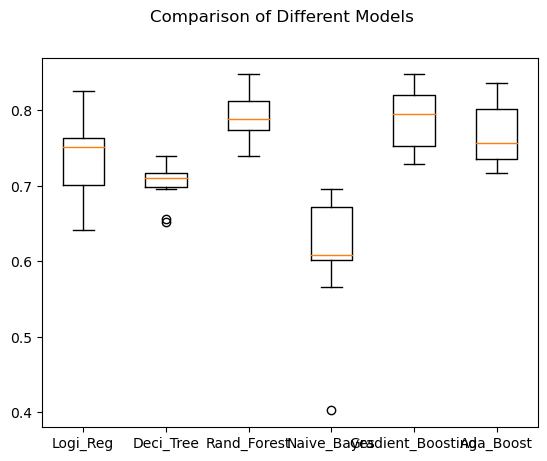

In [ ]:
# prepare configuration for cross validation
seed = 7

# prepare models
models = []
models.append(('Logi_Reg', LogisticRegression()))
models.append(('Deci_Tree', DecisionTreeClassifier()))
models.append(('Rand_Forest', RandomForestClassifier()))
models.append(('Naive_Bayes', GaussianNB()))
models.append(("Gradient_Boosting", GradientBoostingClassifier()))
models.append(("Ada_Boost", AdaBoostClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, scaled_data, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot for Comparison of Different Models
fig = plt.figure()
fig.suptitle('Comparison of Different Models')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

from the above results, Out of all models Random Forest and Gradient_Boosting have good results. So, we will go with these models.

In [ ]:
cls = GradientBoostingClassifier(random_state=7)
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)

Now, we will check the accuracry of this model. we also make confusion matrix and generate a classification report.

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7675675675675676
[[ 39  34]
 [  9 103]]
              precision    recall  f1-score   support

           0       0.81      0.53      0.64        73
           1       0.75      0.92      0.83       112

    accuracy                           0.77       185
   macro avg       0.78      0.73      0.74       185
weighted avg       0.78      0.77      0.76       185



In [ ]:
cls1 = RandomForestClassifier(random_state=7)
cls1.fit(X_train,y_train)
y_pred = cls1.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7783783783783784
[[ 42  31]
 [ 10 102]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.67        73
           1       0.77      0.91      0.83       112

    accuracy                           0.78       185
   macro avg       0.79      0.74      0.75       185
weighted avg       0.78      0.78      0.77       185



From above, random forest is giving better results for this model. it has 77.84% accuracy.